In [19]:
import json

from src.fillzone import FillzoneState, new_fillzone_game, find_conquered_border
from src.bfs_solver import bfs_solve
from src.dfs_solver import dfs_solve
from src.greedy_solver import greedy_solve
from src.a_star_solver import a_star_solve
from src.heuristics import AdmissibleHeuristics, NonAdmissibleHeuristics
import numpy as np
import matplotlib.pyplot as plt

In [26]:
with open("config.json", "r") as f:
   config = json.load(f)

grid_size = config["grid_size"]
color_count = config["color_count"]

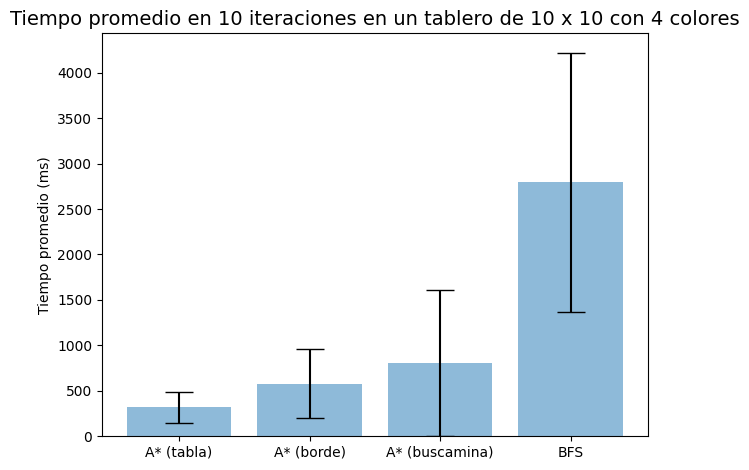

In [3]:
"""
    Este código genera el gráfico correspondiente al tiempo promedio de ejecución de los algoritmos optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_times_h1 = []
a_star_times_h2 = []
a_star_times_h3 = []
bfs_times = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A*
    result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    a_star_times_h1.append(result.time * 1000)

    result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_border)
    a_star_times_h2.append(result.time * 1000)

    result = a_star_solve(fz, AdmissibleHeuristics.buscaminas_distance)
    a_star_times_h3.append(result.time * 1000)

    # BFS
    result = bfs_solve(fz)
    bfs_times.append(result.time * 1000)

# Calculo de la media y desvío estándar para cada método
a_star_mean_h1 = np.mean(a_star_times_h1)
a_star_mean_h2 = np.mean(a_star_times_h2)
a_star_mean_h3 = np.mean(a_star_times_h3)
bfs_mean = np.mean(bfs_times)

a_star_std_h1 = np.std(a_star_times_h1)
a_star_std_h2 = np.std(a_star_times_h2)
a_star_std_h3 = np.mean(a_star_times_h3)
bfs_std = np.std(bfs_times)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean_h1, a_star_mean_h2, a_star_mean_h3, bfs_mean]
stds = [a_star_std_h1, a_star_std_h2, a_star_std_h3 ,bfs_std]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (tabla)", "A* (borde)", "A* (buscamina)", "BFS"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Tiempo promedio (ms)")
ax.set_ylim(bottom=0)
ax.set_title(f"Tiempo promedio en {iters} iteraciones en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)
plt.tight_layout()
plt.show()

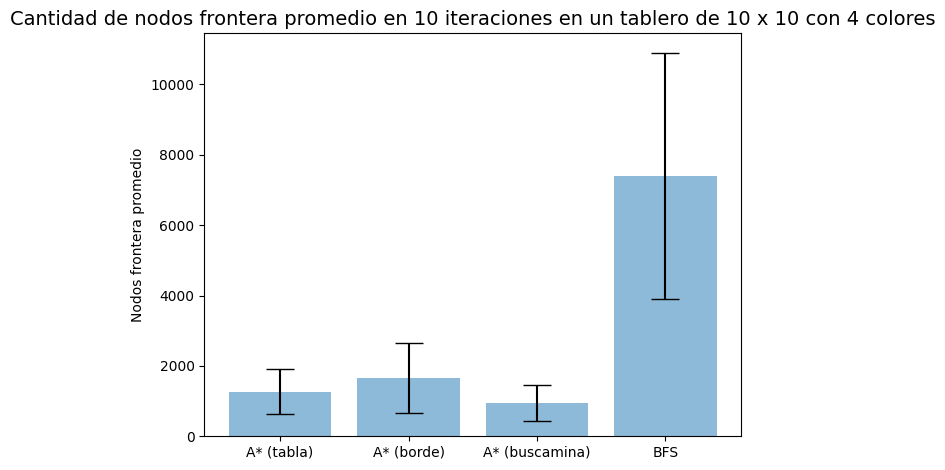

In [4]:
"""
    Este codigo genera el gráfico correspondiente a la cantidad de nodos frontera de los algoritmos optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_nodes_h1 = []
a_star_nodes_h2 = []
a_star_nodes_h3 = []
bfs_nodes = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A*
    result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    a_star_nodes_h1.append(result.border_nodes)

    result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_border)
    a_star_nodes_h2.append(result.border_nodes)

    result = a_star_solve(fz, AdmissibleHeuristics.buscaminas_distance)
    a_star_nodes_h3.append(result.border_nodes)

    # BFS
    result = bfs_solve(fz)
    bfs_nodes.append(result.border_nodes)

# Calculo de la media y desvío estándar para cada método
a_star_mean_h1 = np.mean(a_star_nodes_h1)
a_star_mean_h2 = np.mean(a_star_nodes_h2)
a_star_mean_h3 = np.mean(a_star_nodes_h3)
bfs_mean = np.mean(bfs_nodes)

a_star_std_h1 = np.std(a_star_nodes_h1)
a_star_std_h2 = np.std(a_star_nodes_h2)
a_star_std_h3 = np.std(a_star_nodes_h3)
bfs_std = np.std(bfs_nodes)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean_h1, a_star_mean_h2, a_star_mean_h3, bfs_mean]
stds = [a_star_std_h1, a_star_std_h2, a_star_std_h3, bfs_std]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (tabla)", "A* (borde)", "A* (buscamina)", "BFS"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Nodos frontera promedio")
ax.set_ylim(bottom=0)
ax.set_title(f"Cantidad de nodos frontera promedio en {iters} iteraciones "
             f"en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)
plt.tight_layout()
plt.show()

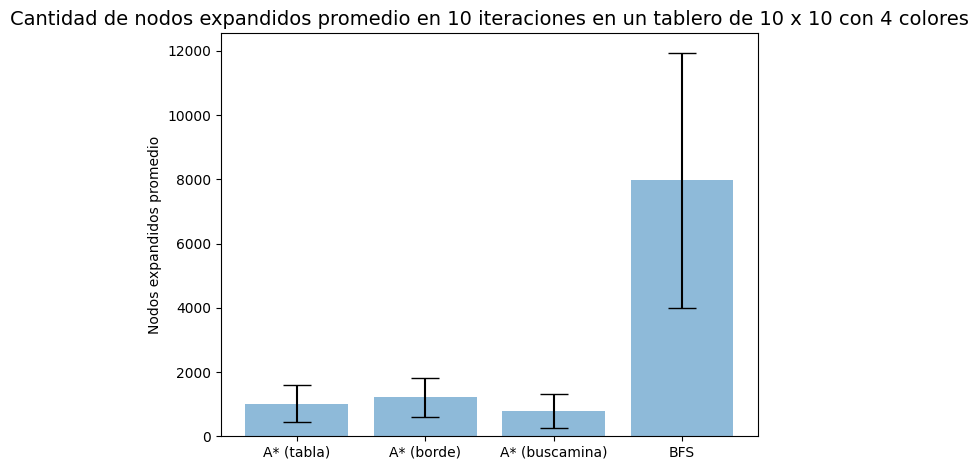

In [5]:
"""
    Este codigo genera el gráfico correspondiente a la cantidad de expandidos por los algoritmos optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_nodes_h1 = []
a_star_nodes_h2 = []
a_star_nodes_h3 = []
bfs_nodes = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A*
    result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    a_star_nodes_h1.append(result.nodes_expanded)

    result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_border)
    a_star_nodes_h2.append(result.nodes_expanded)

    result = a_star_solve(fz, AdmissibleHeuristics.buscaminas_distance)
    a_star_nodes_h3.append(result.nodes_expanded)

    # BFS
    result = bfs_solve(fz)
    bfs_nodes.append(result.nodes_expanded)

# Calculo de la media y desvío estándar para cada método
a_star_mean_h1 = np.mean(a_star_nodes_h1)
a_star_mean_h2 = np.mean(a_star_nodes_h2)
a_star_mean_h3 = np.mean(a_star_nodes_h3)
bfs_mean = np.mean(bfs_nodes)

a_star_std_h1 = np.std(a_star_nodes_h1)
a_star_std_h2 = np.std(a_star_nodes_h2)
a_star_std_h3 = np.std(a_star_nodes_h3)
bfs_std = np.std(bfs_nodes)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean_h1, a_star_mean_h2, a_star_mean_h3, bfs_mean]
stds = [a_star_std_h1, a_star_std_h2, a_star_std_h3, bfs_std]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (tabla)", "A* (borde)", "A* (buscamina)", "BFS"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Nodos expandidos promedio")
ax.set_ylim(bottom=0)
ax.set_title(f"Cantidad de nodos expandidos promedio en {iters} iteraciones "
             f"en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)
plt.tight_layout()
plt.show()

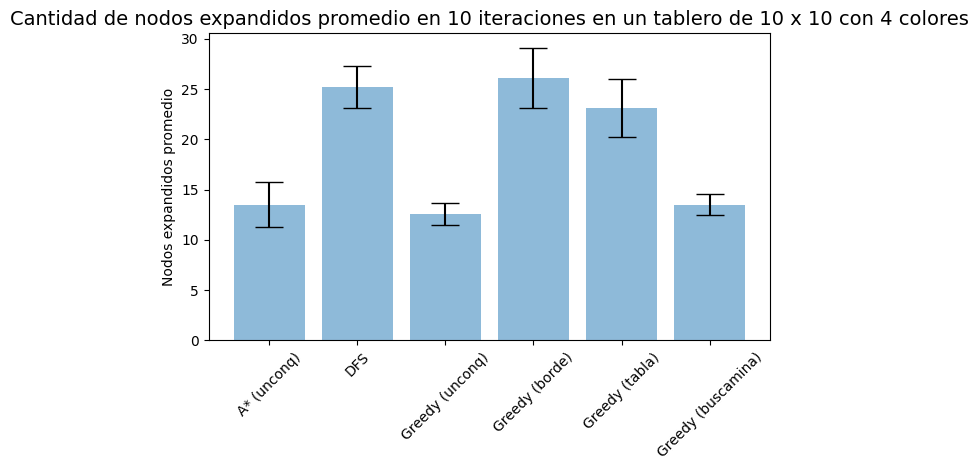

In [8]:
"""
    Este codigo genera el gráfico correspondiente a la cantidad de nodos expandidos por los algoritmos no optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_nodes = []
dfs_nodes = []
greedy_nodes_h1 = []
greedy_nodes_h2 = []
greedy_nodes_h3 = []
greedy_nodes_h4 = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A*
    result = a_star_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
    a_star_nodes.append(result.nodes_expanded)

    # DFS
    result = dfs_solve(fz)
    dfs_nodes.append(result.nodes_expanded)

    # Greedy
    result = greedy_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
    greedy_nodes_h1.append(result.nodes_expanded)

    result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_border)
    greedy_nodes_h2.append(result.nodes_expanded)

    result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    greedy_nodes_h3.append(result.nodes_expanded)

    result = greedy_solve(fz, AdmissibleHeuristics.buscaminas_distance)
    greedy_nodes_h4.append(result.nodes_expanded)

# Calculo de la media y desvío estándar para cada método
a_star_mean = np.mean(a_star_nodes)
dfs_mean = np.mean(dfs_nodes)
greedy_mean_h1 = np.mean(greedy_nodes_h1)
greedy_mean_h2 = np.mean(greedy_nodes_h2)
greedy_mean_h3 = np.mean(greedy_nodes_h3)
greedy_mean_h4 = np.mean(greedy_nodes_h4)

a_star_std = np.std(a_star_nodes)
dfs_std = np.std(dfs_nodes)
greedy_std_h1 = np.std(greedy_nodes_h1)
greedy_std_h2 = np.std(greedy_nodes_h2)
greedy_std_h3 = np.std(greedy_nodes_h3)
greedy_std_h4 = np.std(greedy_nodes_h4)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean, dfs_mean, greedy_mean_h1, greedy_mean_h2, greedy_mean_h3, greedy_mean_h4]
stds = [a_star_std, dfs_std, greedy_std_h1, greedy_std_h2, greedy_std_h3, greedy_std_h4]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (unconq)", "DFS", "Greedy (unconq)", "Greedy (borde)", "Greedy (tabla)", "Greedy (buscamina)"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Nodos expandidos promedio")
ax.set_ylim(bottom=0)
ax.set_title(f"Cantidad de nodos expandidos promedio en {iters} iteraciones "
             f"en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)

plt.setp(ax.get_xticklabels(), rotation=45, ha="center", fontsize=10)
plt.subplots_adjust(bottom=0.2, wspace=0.4) # Aumentar espacio en la parte inferior del gráfico y el espacio entre etiquetas
plt.tight_layout()
plt.show()

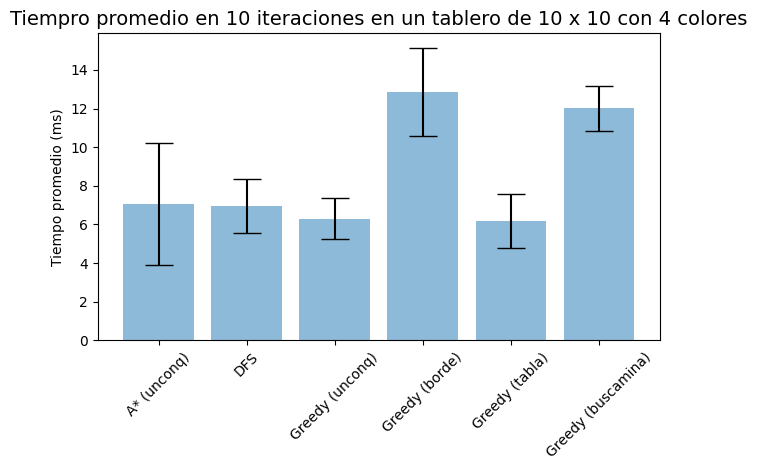

In [9]:
"""
    Este codigo genera el gráfico correspondiente al tiempo promedio de ejecucion de los algoritmos no optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_time = []
dfs_time = []
greedy_time_h1 = []
greedy_time_h2 = []
greedy_time_h3 = []
greedy_time_h4 = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A*
    result = a_star_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
    a_star_time.append(result.time * 1000)

    # DFS
    result = dfs_solve(fz)
    dfs_time.append(result.time * 1000)

    # Greedy
    result = greedy_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
    greedy_time_h1.append(result.time * 1000)

    result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_border)
    greedy_time_h2.append(result.time * 1000)

    result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    greedy_time_h3.append(result.time * 1000)

    result = greedy_solve(fz, AdmissibleHeuristics.buscaminas_distance)
    greedy_time_h4.append(result.time * 1000)


# Calculo de la media y desvío estándar para cada método
a_star_mean = np.mean(a_star_time)
dfs_mean = np.mean(dfs_time)
greedy_mean_h1 = np.mean(greedy_time_h1)
greedy_mean_h2 = np.mean(greedy_time_h2)
greedy_mean_h3 = np.mean(greedy_time_h3)
greedy_mean_h4 = np.mean(greedy_time_h4)

a_star_std = np.std(a_star_time)
dfs_std = np.std(dfs_time)
greedy_std_h1 = np.std(greedy_time_h1)
greedy_std_h2 = np.std(greedy_time_h2)
greedy_std_h3 = np.std(greedy_time_h3)
greedy_std_h4 = np.std(greedy_time_h4)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean, dfs_mean, greedy_mean_h1, greedy_mean_h2, greedy_mean_h3, greedy_mean_h4]
stds = [a_star_std, dfs_std, greedy_std_h1, greedy_std_h2, greedy_std_h3, greedy_std_h4]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (unconq)", "DFS", "Greedy (unconq)",
            "Greedy (borde)", "Greedy (tabla)", "Greedy (buscamina)"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Tiempo promedio (ms)")
ax.set_ylim(bottom=0)
ax.set_title(f"Tiempro promedio en {iters} iteraciones "
             f"en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)

plt.setp(ax.get_xticklabels(), rotation=45, ha="center", fontsize=10)
plt.subplots_adjust(bottom=0.2, wspace=0.4) # Aumentar espacio en la parte inferior del gráfico y el espacio entre etiquetas
plt.tight_layout()
plt.show()

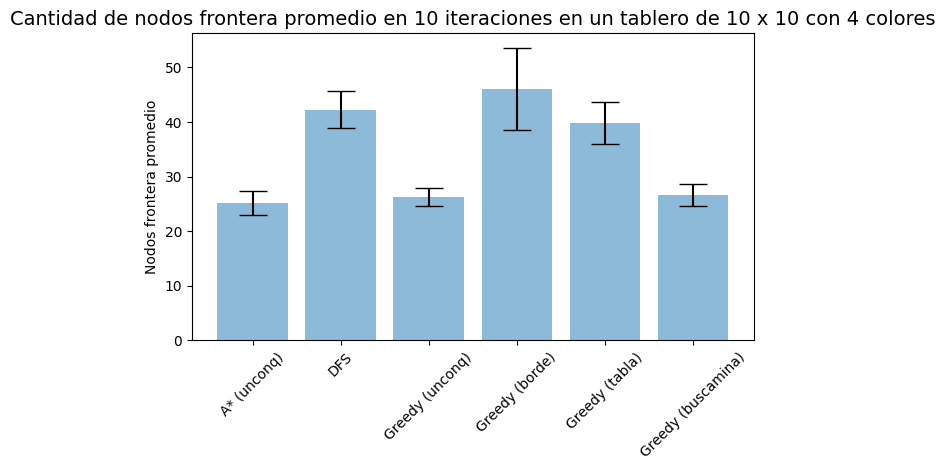

In [11]:
"""
    Este codigo genera el gráfico correspondiente a la cantidad de nodos frontera obtenidos por los algoritmos no optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_nodes = []
dfs_nodes = []
greedy_nodes_h1 = []
greedy_nodes_h2 = []
greedy_nodes_h3 = []
greedy_nodes_h4 = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A*
    result = a_star_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
    a_star_nodes.append(result.border_nodes)

    # DFS
    result = dfs_solve(fz)
    dfs_nodes.append(result.border_nodes)

    # Greedy
    result = greedy_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
    greedy_nodes_h1.append(result.border_nodes)

    result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_border)
    greedy_nodes_h2.append(result.border_nodes)

    result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    greedy_nodes_h3.append(result.border_nodes)

    result = greedy_solve(fz, AdmissibleHeuristics.buscaminas_distance)
    greedy_nodes_h4.append(result.border_nodes)


# Calculo de la media y desvío estándar para cada método
a_star_mean = np.mean(a_star_nodes)
dfs_mean = np.mean(dfs_nodes)
greedy_mean_h1 = np.mean(greedy_nodes_h1)
greedy_mean_h2 = np.mean(greedy_nodes_h2)
greedy_mean_h3 = np.mean(greedy_nodes_h3)
greedy_mean_h4 = np.mean(greedy_nodes_h4)

a_star_std = np.std(a_star_nodes)
dfs_std = np.std(dfs_nodes)
greedy_std_h1 = np.std(greedy_nodes_h1)
greedy_std_h2 = np.std(greedy_nodes_h2)
greedy_std_h3 = np.std(greedy_nodes_h3)
greedy_std_h4 = np.std(greedy_nodes_h4)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean, dfs_mean, greedy_mean_h1, greedy_mean_h2, greedy_mean_h3, greedy_mean_h4]
stds = [a_star_std, dfs_std, greedy_std_h1, greedy_std_h2, greedy_std_h3, greedy_std_h4]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (unconq)", "DFS", "Greedy (unconq)", "Greedy (borde)", "Greedy (tabla)", "Greedy (buscamina)"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Nodos frontera promedio")
ax.set_ylim(bottom=0)
ax.set_title(f"Cantidad de nodos frontera promedio en {iters} iteraciones "
             f"en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)

plt.setp(ax.get_xticklabels(), rotation=45, ha="center", fontsize=10)
plt.subplots_adjust(bottom=0.2, wspace=0.4) # Aumentar espacio en la parte inferior del gráfico y el espacio entre etiquetas
plt.tight_layout()
plt.show()

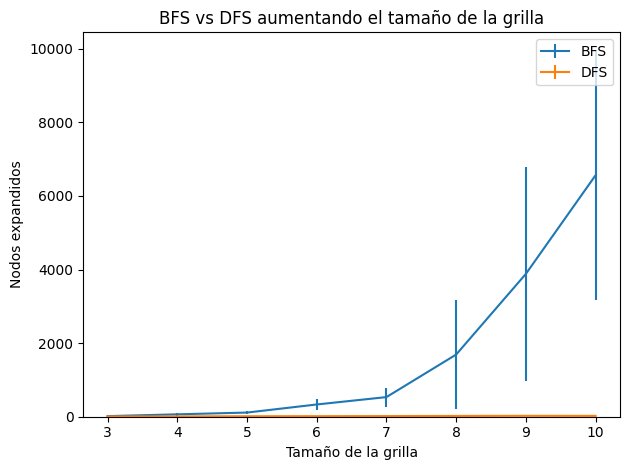

In [13]:
"""
    BFS vs DFS
"""
initial_grid = 3
final_grid = grid_size
iters = 10

df = []

for grid_size in range(initial_grid, final_grid + 1):
    dfs_times = []
    bfs_times = []

    for i in range(iters):
        fz = new_fillzone_game(grid_size, color_count)

        # DFS
        result = dfs_solve(fz)
        dfs_times.append(result.nodes_expanded)

        # BFS
        result = bfs_solve(fz)
        bfs_times.append(result.nodes_expanded)

    dfs_mean = np.mean(dfs_times)
    bfs_mean = np.mean(bfs_times)

    dfs_std = np.std(dfs_times)
    bfs_std = np.std(bfs_times)

    df.append(
        {
            'grid_size': grid_size,
            'dfs_mean': dfs_mean,
            'dfs_std': dfs_std,
            'bfs_mean': bfs_mean,
            'bfs_std': bfs_std
        }
    )

x = [d['grid_size'] for d in df]
y_bfs = [d['bfs_mean'] for d in df]
y_dfs = [d['dfs_mean'] for d in df]
stds_bfs = [d['bfs_std'] for d in df]
stds_dfs = [d['dfs_std'] for d in df]

plt.errorbar(x, y_bfs, yerr=stds_bfs, label='BFS')
plt.errorbar(x, y_dfs, yerr=stds_dfs, label='DFS')

plt.xticks(range(initial_grid, final_grid + 1))
plt.ylim(0)

plt.title('BFS vs DFS aumentando el tamaño de la grilla')
plt.legend()

plt.xlabel('Tamaño de la grilla')
plt.ylabel('Nodos expandidos')

plt.tight_layout()
plt.show()

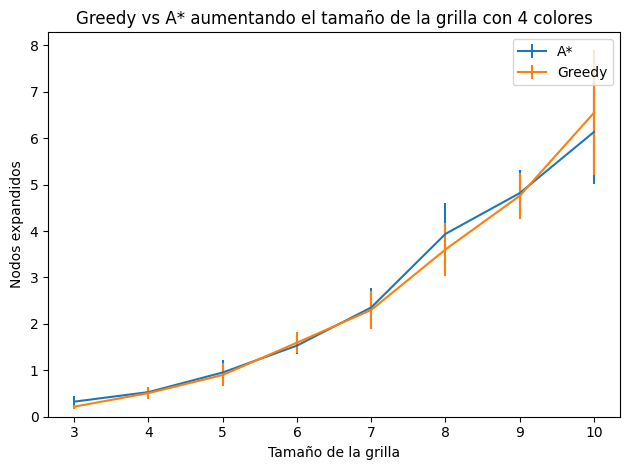

In [15]:
"""
    A* vs Greedy con heurística no admisible
"""

initial_grid = 3
final_grid = grid_size
iters = 10

df = []

for grid_size in range(initial_grid, final_grid + 1):
    a_start_times = []
    greedy_times = []

    for i in range(iters):
        fz = new_fillzone_game(grid_size, color_count)

        # A*
        result = a_star_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
        a_start_times.append(result.time * 1000)

        # Greedy
        result = greedy_solve(fz, NonAdmissibleHeuristics.amount_of_unconquered_cells)
        greedy_times.append(result.time * 1000)

    a_star_mean = np.mean(a_start_times)
    greedy_mean = np.mean(greedy_times)

    a_star_std = np.std(a_start_times)
    greedy_std = np.std(greedy_times)

    df.append(
        {
            'grid_size': grid_size,
            'a_star_mean': a_star_mean,
            'a_star_std': a_star_std,
            'greedy_mean': greedy_mean,
            'greedy_std': greedy_std
        }
    )

x = [d['grid_size'] for d in df]
y_a_star = [d['a_star_mean'] for d in df]
y_greedy = [d['greedy_mean'] for d in df]
stds_a_star = [d['a_star_std'] for d in df]
stds_greedy = [d['greedy_std'] for d in df]

plt.errorbar(x, y_a_star, yerr=stds_a_star, label='A*')
plt.errorbar(x, y_greedy, yerr=stds_greedy, label='Greedy')

plt.xticks(range(initial_grid, final_grid + 1))
plt.ylim(0)

plt.title(f'Greedy vs A* aumentando el tamaño de la grilla con {color_count} colores')
plt.legend()

plt.xlabel('Tamaño de la grilla')
plt.ylabel('Nodos expandidos')

plt.tight_layout()
plt.show()

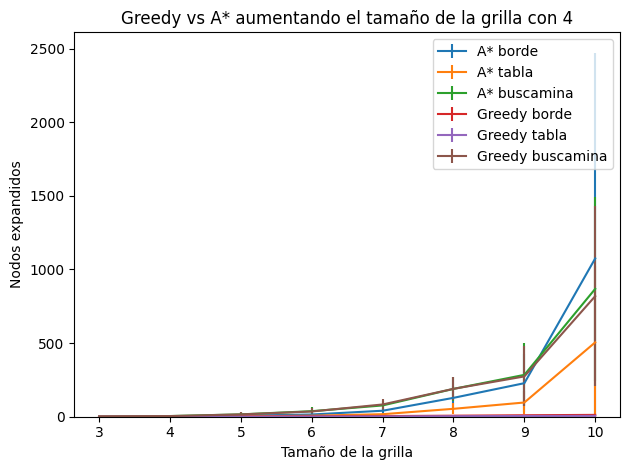

In [28]:
"""
    Greedy vs A* con heurísticas admisibles
"""

initial_grid = 3
final_grid = grid_size
iters = 10

df = []

for grid_size in range(initial_grid, final_grid + 1):
    a_start_times_h1 = []
    a_start_times_h2 = []
    a_start_times_h3 = []
    greedy_times_h1 = []
    greedy_times_h2 = []
    greedy_times_h3 = []

    for i in range(iters):
        fz = new_fillzone_game(grid_size, color_count)
        # A*
        result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_border)
        a_start_times_h1.append(result.time * 1000)

        result = a_star_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
        a_start_times_h2.append(result.time * 1000)

        result = a_star_solve(fz, AdmissibleHeuristics.buscaminas_distance)
        a_start_times_h3.append(result.time * 1000)

        # Greedy
        result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_border)
        greedy_times_h1.append(result.time * 1000)

        result = greedy_solve(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
        greedy_times_h2.append(result.time * 1000)

        result = a_star_solve(fz, AdmissibleHeuristics.buscaminas_distance)
        greedy_times_h3.append(result.time * 1000)


    a_star_mean_h1 = np.mean(a_start_times_h1)
    a_star_mean_h2 = np.mean(a_start_times_h2)
    a_star_mean_h3 = np.mean(a_start_times_h3)
    greedy_mean_h1 = np.mean(greedy_times_h1)
    greedy_mean_h2 = np.mean(greedy_times_h2)
    greedy_mean_h3 = np.mean(greedy_times_h3)

    a_star_std_h1 = np.std(a_start_times_h1)
    a_star_std_h2 = np.std(a_start_times_h2)
    a_star_std_h3 = np.std(a_start_times_h3)
    greedy_std_h1 = np.std(greedy_times_h1)
    greedy_std_h2 = np.std(greedy_times_h2)
    greedy_std_h3 = np.std(greedy_times_h3)

    df.append(
        {
            'grid_size': grid_size,
            'a_star_mean_h1': a_star_mean_h1,
            'a_star_std_h1': a_star_std_h1,
            'greedy_mean_h1': greedy_mean_h1,
            'greedy_std_h1': greedy_std_h1,
            'a_star_mean_h2': a_star_mean_h2,
            'a_star_std_h2': a_star_std_h2,
            'greedy_mean_h2': greedy_mean_h2,
            'greedy_std_h2': greedy_std_h2,
            'a_star_mean_h3': a_star_mean_h3,
            'a_star_std_h3': a_star_std_h3,
            'greedy_mean_h3': greedy_mean_h3,
            'greedy_std_h3': greedy_std_h3,
        }
    )

x = [d['grid_size'] for d in df]
y_a_star_h1 = [d['a_star_mean_h1'] for d in df]
y_a_star_h2 = [d['a_star_mean_h2'] for d in df]
y_a_star_h3 = [d['a_star_mean_h3'] for d in df]
y_greedy_h1 = [d['greedy_mean_h1'] for d in df]
y_greedy_h2 = [d['greedy_mean_h2'] for d in df]
y_greedy_h3 = [d['greedy_mean_h3'] for d in df]
stds_a_star_h1 = [d['a_star_std_h1'] for d in df]
stds_a_star_h2 = [d['a_star_std_h2'] for d in df]
stds_a_star_h3 = [d['a_star_std_h3'] for d in df]
stds_greedy_h1 = [d['greedy_std_h1'] for d in df]
stds_greedy_h2 = [d['greedy_std_h2'] for d in df]
stds_greedy_h3 = [d['greedy_std_h3'] for d in df]

plt.errorbar(x, y_a_star_h1, yerr=stds_a_star_h1, label='A* borde')
plt.errorbar(x, y_a_star_h2, yerr=stds_a_star_h2, label='A* tabla')
plt.errorbar(x, y_a_star_h3, yerr=stds_a_star_h3, label='A* buscamina')
plt.errorbar(x, y_greedy_h1, yerr=stds_greedy_h1, label='Greedy borde')
plt.errorbar(x, y_greedy_h2, yerr=stds_greedy_h2, label='Greedy tabla')
plt.errorbar(x, y_greedy_h3, yerr=stds_greedy_h3, label='Greedy buscamina')

plt.xticks(range(initial_grid, final_grid + 1))
plt.ylim(0)

plt.title(f'Greedy vs A* aumentando el tamaño de la grilla con {color_count}')
plt.legend()

plt.xlabel('Tamaño de la grilla')
plt.ylabel('Nodos expandidos')

plt.tight_layout()
plt.show()